In [16]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import mpld3

In [22]:
data = pd.read_csv("./relations.csv")
label = pd.read_csv("./characters.csv")
G_hp = nx.Graph()

In [23]:
for _, edge in data.iterrows():
    G_hp.add_edge(edge['source'], edge['target'])


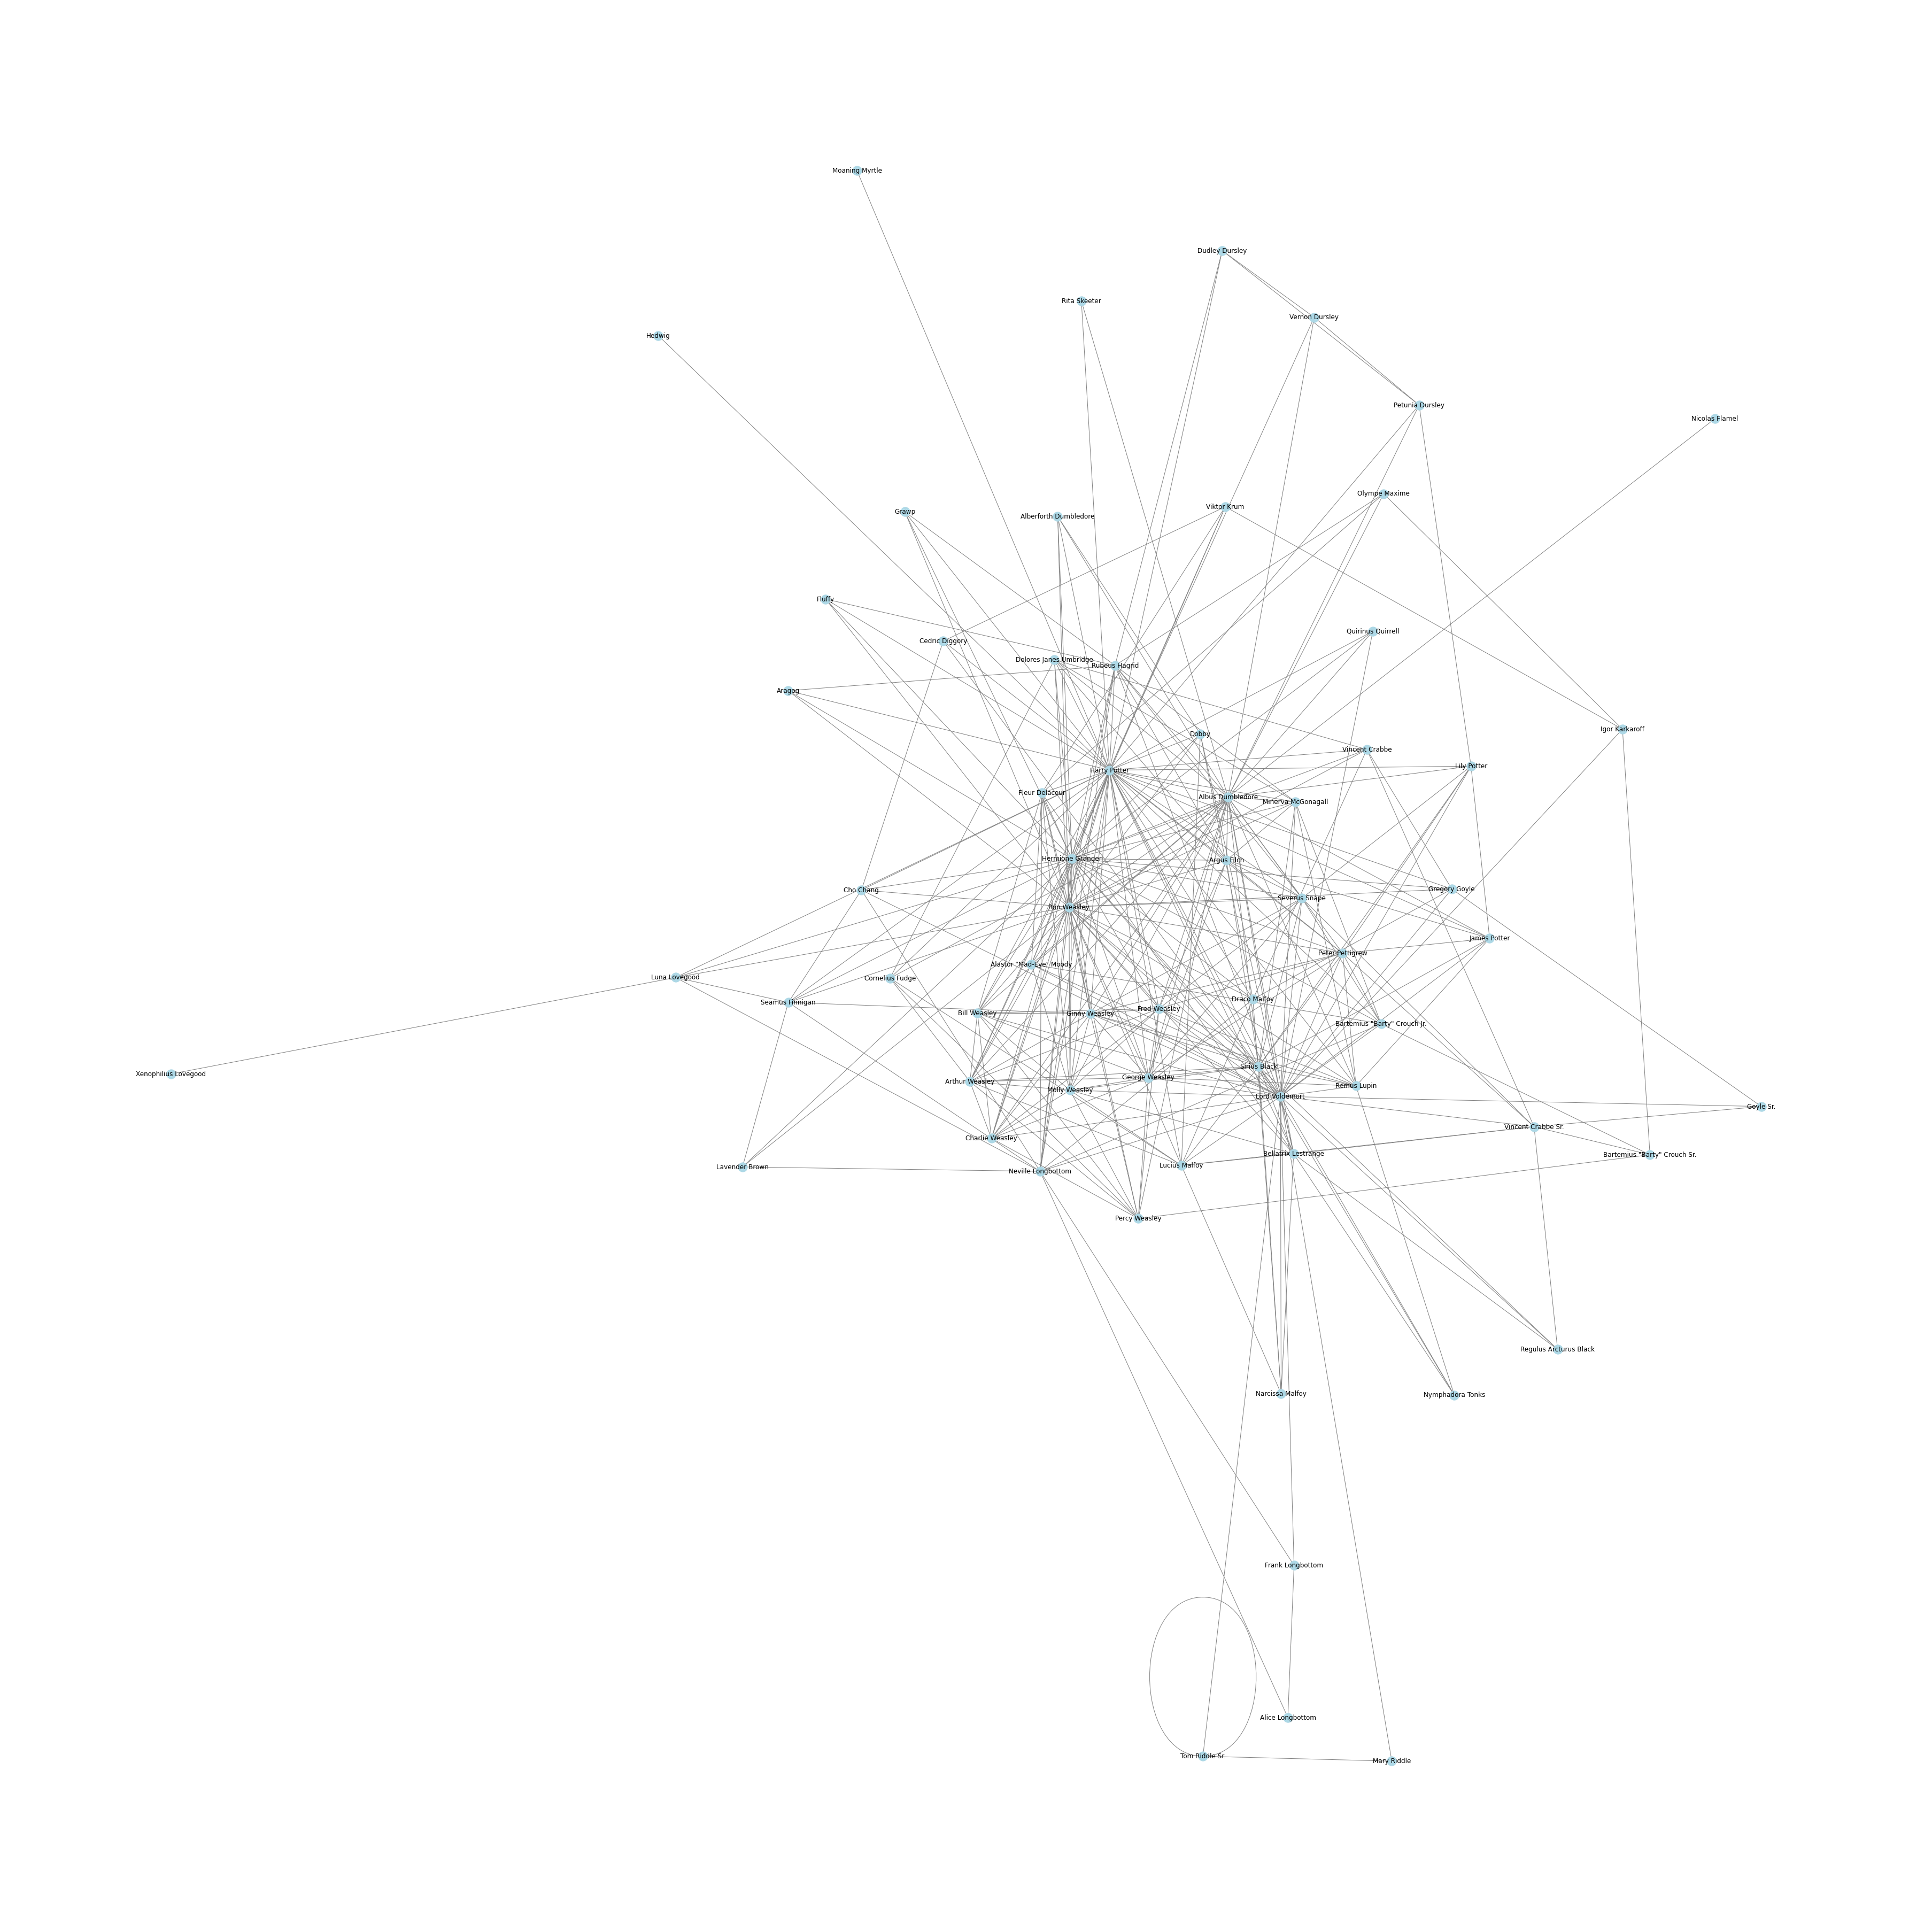

In [38]:
plt.figure(figsize=(50,50))

labels = {row["id"]: row["name"] for index, row in label.iterrows()}

nx.set_node_attributes(G_hp, labels, "name")

pos = nx.spring_layout(G_hp)  
node_labels = nx.get_node_attributes(G_hp, "name")
nx.draw(G_hp, with_labels=True, labels=node_labels, node_color='lightblue', edge_color="gray")
plt.show()


In [39]:
import community

partition = community.best_partition(G_hp)

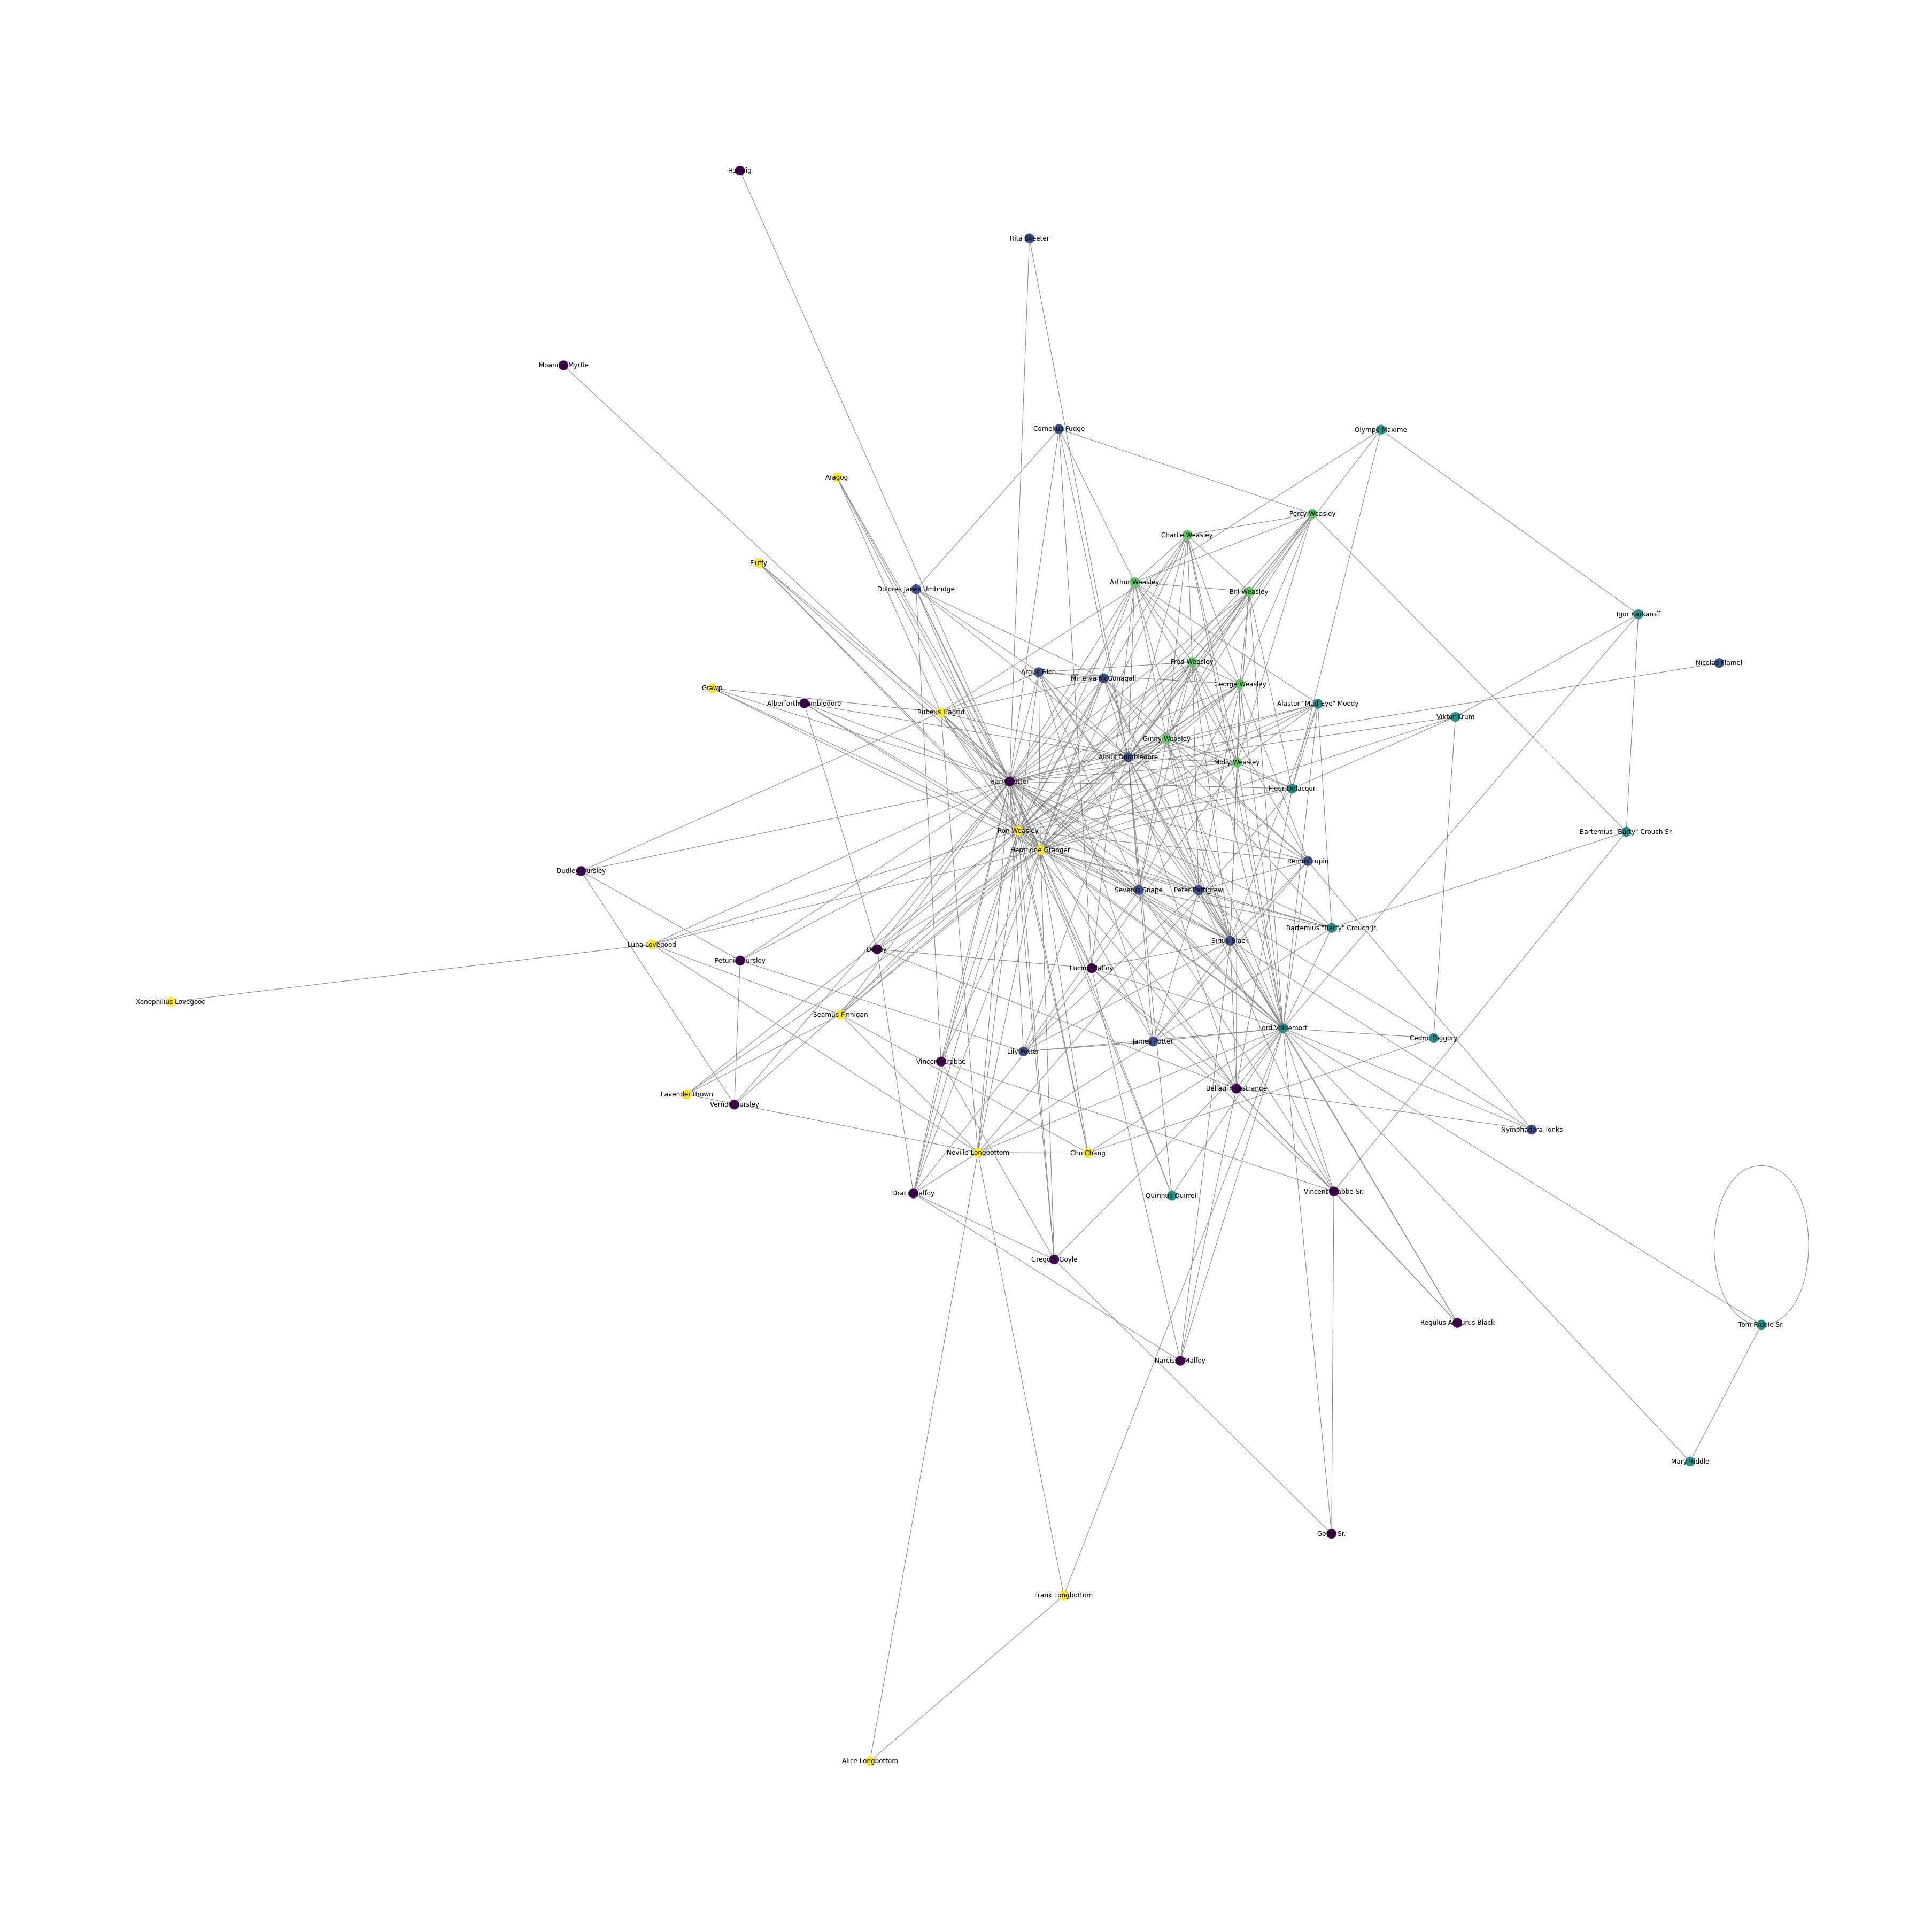

In [45]:
colors = [partition[node] for node in G_hp.nodes()]

plt.figure(figsize=(50,50))
pos = nx.spring_layout(G_hp)
nx.draw(G_hp, pos, node_color=colors, with_labels=True, labels=node_labels,edge_color="gray")
plt.show()